# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set_theme()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing and EDA

## Basic Data Exploration

In [2]:
# Loading the dataset
data1 = pd.read_csv('data\Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('data\Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('data\Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('data\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv('data\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('data\Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('data\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('data\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [3]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [4]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [5]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [6]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [7]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [9]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Data Cleaning

### Duplicates

In [10]:
## Duplicate values
duplicates = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicates)}')

Number of duplicates: 308381


In [11]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

### Missing Values

In [12]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [13]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


Infinity values often arise from divisions by zero or extreme calculations (e.g., dividing a large number by a very small number). These operations may occur in flow-related features like `Flow Bytes/s` or `Flow Packets/s`. These can severely disrupt machine learning algorithms, leading to inaccurate results or model failures, as most algorithms cannot handle infinity.

In [14]:
# Replacing any infinite values (positive or negative) with NaN
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [15]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [16]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


### Visualize Missing Values

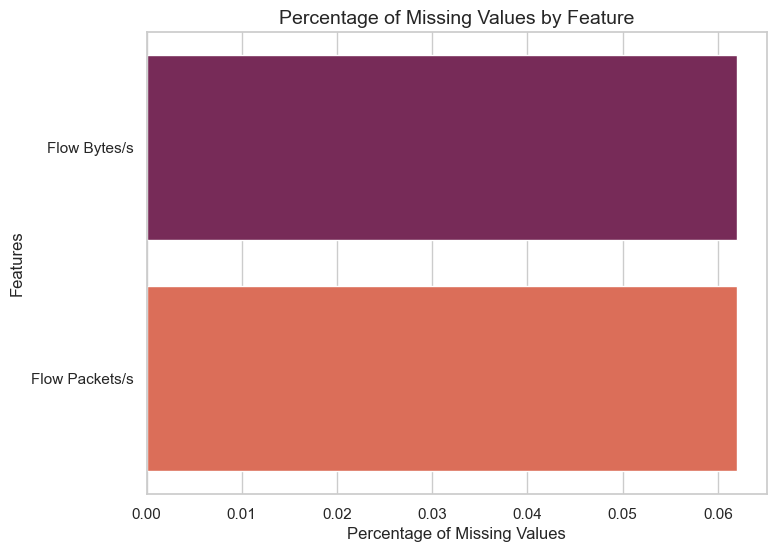

In [17]:
# Identify columns with missing values and their counts
missing_vals = data.isna().sum()
missing_vals = missing_vals[missing_vals > 0]

# Calculate the percentage of missing values
missing_percent = (missing_vals / len(data)) * 100

# Sort the values in descending order
missing_percent = missing_percent.sort_values(ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid", palette="rocket")
sns.barplot(
    x=missing_percent.values,
    y=missing_percent.index,
    palette="rocket"
)

# Add labels and title
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Percentage of Missing Values by Feature', fontsize=14)

# Display the plot
plt.show()

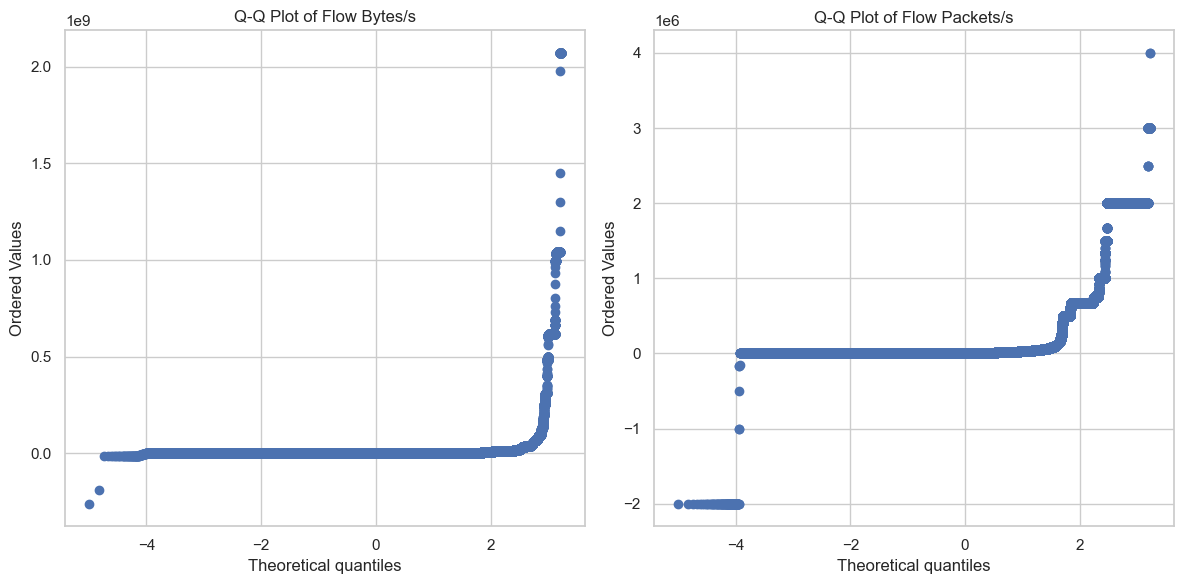

In [18]:
import scipy.stats as stats

# Create subplots for the Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for 'Flow Bytes/s'
stats.probplot(data['Flow Bytes/s'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot of Flow Bytes/s')

# Q-Q plot for 'Flow Packets/s'
stats.probplot(data['Flow Packets/s'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Flow Packets/s')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

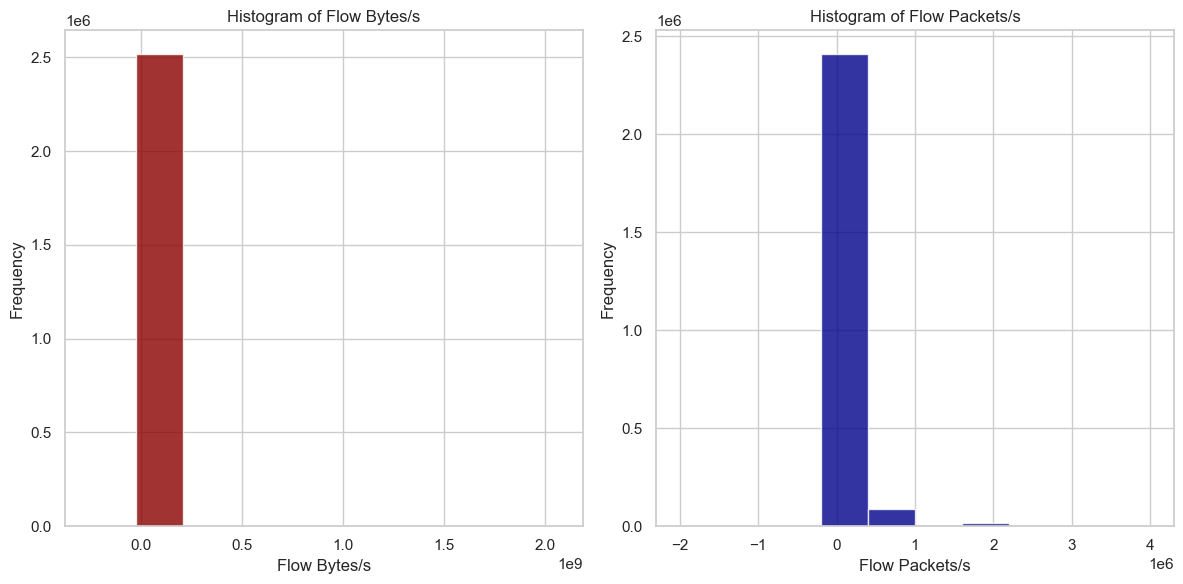

In [19]:
# Defining the colors array with darker colors
colors = ['darkred', 'darkblue']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for 'Flow Bytes/s' (dark red color with transparency)
axes[0].hist(data['Flow Bytes/s'], color=colors[0], alpha=0.8)
axes[0].set_title('Histogram of Flow Bytes/s')
axes[0].set_xlabel('Flow Bytes/s')
axes[0].set_ylabel('Frequency')

# Second subplot for 'Flow Packets/s' (dark blue color with transparency)
axes[1].hist(data['Flow Packets/s'], color=colors[1], alpha=0.8)
axes[1].set_title('Histogram of Flow Packets/s')
axes[1].set_xlabel('Flow Packets/s')
axes[1].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#### Dealing with missing values (Columns with missing data)

In [20]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


Since `Flow Bytes/s` and `Flow Packets/s` have extreme values or outliers, we'll fill missing values with the median to avoid introducing new categories or disrupting the data distribution.

In [21]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

In [22]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


## Data Visualization

In [23]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [24]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [25]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [26]:
data.drop('Label', axis = 1, inplace = True)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [28]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [29]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'rocket', axis = None).format(precision = 2)

In [30]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [31]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [32]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

* There are 32 features with positive correlations that may help in predicting the target feature.
* The columns with zero standard deviation have the same value in all rows. These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns which results in NaN correlation cofficient. These columns cannot help differentiate between the classes or groups of data. So, these zero standard deviation columns don't contribute to the correlation matrix and will appear blank in the heatmap. This can be helpful while doing data processing as we may drop the columns if we find out that these columns has no variation.

### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

**Due to the large dataset's time and computational cost, we sampled 20% for analysis. We ensured the sample's representativeness by comparing descriptive statistics (mean) and features that varied by more than 5% from the dataset's actual mean.**

In [33]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [34]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8686.623973           0.21%
Flow Duration                   16581323.773163       16502842.174093       0.47%
Total Fwd Packets               10.276271             12.078062             17.53%
Total Backward Packets          11.565964             13.914412             20.30%
Total Length of Fwd Packets     611.575108            601.844586            1.59%
Total Length of Bwd Packets     18133.153930          24424.988089          34.70%
Fwd Packet Length Max           231.091768            230.009202            0.47%
Fwd Packet Length Min           19.194641             19.036484             0.82%
Fwd Packet Length Mean          63.470104             63.151403             0.50%
Fwd Packet Length Std 

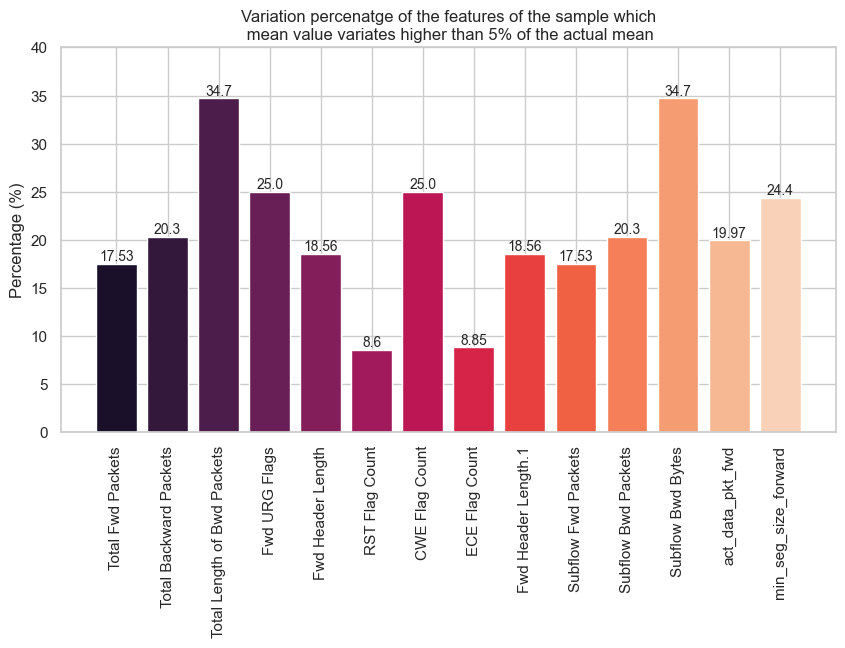

In [35]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('rocket', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [36]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33346
2.  Flow Duration                 : 256627
3.  Total Fwd Packets             : 659
4.  Total Backward Packets        : 820
5.  Total Length of Fwd Packets   : 9070
6.  Total Length of Bwd Packets   : 23963
7.  Fwd Packet Length Max         : 3701
8.  Fwd Packet Length Min         : 236
9.  Fwd Packet Length Mean        : 34946
10. Fwd Packet Length Std         : 66038
11. Bwd Packet Length Max         : 3936
12. Bwd Packet Length Min         : 449
13. Bwd Packet Length Mean        : 45585
14. Bwd Packet Length Std         : 62492
15. Flow Bytes/s                  : 346856
16. Flow Packets/s                : 288294
17. Flow IAT Mean                 : 274182
18. Flow IAT Std                  : 229680
19. Flow IAT Max                  : 167860
20. Flow IAT Min                  : 45941
21. Fwd IAT Total                 : 119784
22. Fwd IAT Mean                  : 164556
23. Fwd IAT Std                   : 148638
24. Fwd IAT

In [37]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'rocket', axis = None).format(precision = 2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
Destination Port,1.00,-0.17,-0.00,-0.00,0.02,-0.00,0.09,-0.05,0.14,0.12,-0.21,-0.26,-0.24,-0.19,0.07,0.36,-0.11,-0.13,-0.13,-0.02,-0.17,-0.11,-0.11,-0.13,-0.05,-0.12,-0.07,-0.04,-0.06,-0.05,0.23,nan,0.01,nan,0.00,0.00,0.35,0.15,-0.26,-0.14,-0.17,-0.14,-0.08,-0.04,0.23,-0.01,-0.22,0.58,0.52,0.01,-0.01,0.03,-0.17,0.14,-0.24,0.00,nan,nan,nan,nan,nan,nan,-0.00,0.02,-0.00,-0.00,-0.13,0.21,-0.00,0.00,-0.04,-0.05,-0.06,-0.03,-0.13,0.01,-0.12,-0.13,-0.12
Flow Duration,-0.17,1.00,0.02,0.02,0.10,0.02,0.27,-0.12,0.14,0.23,0.49,-0.24,0.45,0.43,-0.02,-0.11,0.54,0.74,0.78,0.06,1.00,0.54,0.72,0.78,0.21,0.82,0.41,0.52,0.58,0.21,-0.02,nan,-0.00,nan,-0.00,0.00,-0.10,-0.08,-0.25,0.50,0.42,0.45,0.27,0.22,-0.02,0.01,0.18,0.04,-0.12,-0.00,0.01,-0.17,0.40,0.14,0.45,-0.00,nan,nan,nan,nan,nan,nan,0.02,0.10,0.02,0.02,0.09,-0.03,0.02,-0.00,0.19,0.25,0.29,0.12,0.76,0.24,0.78,0.73,0.21
Total Fwd Packets,-0.00,0.02,1.00,1.00,0.69,0.99,0.01,-0.00,-0.00,0.00,0.03,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.02,-0.00,-0.00,-0.01,0.03,0.03,0.01,0.01,-0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.69,1.00,0.99,0.00,-0.00,0.87,-0.00,0.12,0.01,0.08,0.13,0.00,0.00,0.00,0.00,-0.00
Total Backward Packets,-0.00,0.02,1.00,1.00,0.68,0.99,0.01,-0.00,-0.00,0.00,0.03,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.02,-0.00,-0.00,-0.01,0.03,0.03,0.01,0.01,-0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.03,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.68,1.00,0.99,0.00,-0.00,0.86,0.00,0.12,0.01,0.08,0.13,0.00,0.00,0.00,0.00,-0.00
Total Length of Fwd Packets,0.02,0.10,0.69,0.68,1.00,0.69,0.31,-0.00,0.29,0.25,0.04,-0.05,0.03,0.01,0.00,-0.02,0.01,0.02,0.04,-0.00,0.10,0.01,0.04,0.04,-0.01,0.12,0.01,0.06,0.07,-0.01,0.01,nan,-0.00,nan,-0.00,0.01,-0.02,-0.02,-0.05,0.12,0.13,0.09,0.06,-0.01,0.01,0.01,0.07,-0.01,-0.01,-0.00,0.01,-0.02,0.12,0.29,0.03,-0.00,nan,nan,nan,nan,nan,nan,0.69,1.00,0.68,0.69,0.05,0.01,0.78,-0.00,0.19,0.12,0.19,0.16,0.03,0.04,0.04,0.03,-0.03
Total Length of Bwd Packets,-0.00,0.02,0.99,0.99,0.69,1.00,0.01,-0.00,-0.00,-0.00,0.03,-0.00,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.02,-0.00,-0.00,-0.01,0.03,0.03,0.01,0.01,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,0.99,0.69,0.99,1.00,0.00,-0.00,0.88,0.00,0.11,0.00,0.07,0.13,0.00,-0.00,0.00,0.00,-0.00
Fwd Packet Length Max,0.09,0.27,0.01,0.01,0.31,0.01,1.00,-0.01,0.

In [38]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

### Outliers

**We identified the outliers of each feature based on attack types and found that this dataset contains many outliers. Outliers increase variability in the dataset. But in the dataset, outliers may indicate different patterns like network intrusion attempts.**

In [39]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109246               21.66
Flow Duration                        93195               18.47
Total Fwd Packets                    50245                9.96
Total Backward Packets               47509                9.42
Total Length of Fwd Packets          62790               12.45
...                                    ...                 ...
Active Min                          111387               22.08
Idle Mean                           113092               22.42
Idle Std                             45767                9.07
Idle Max                            113092               22.42
Idle Min                            113092               22.42

[78 rows x 2 columns]


### Visualization of Categorical Variables

**All the features in our dataset is numerical. We have one Categorical Variable.**

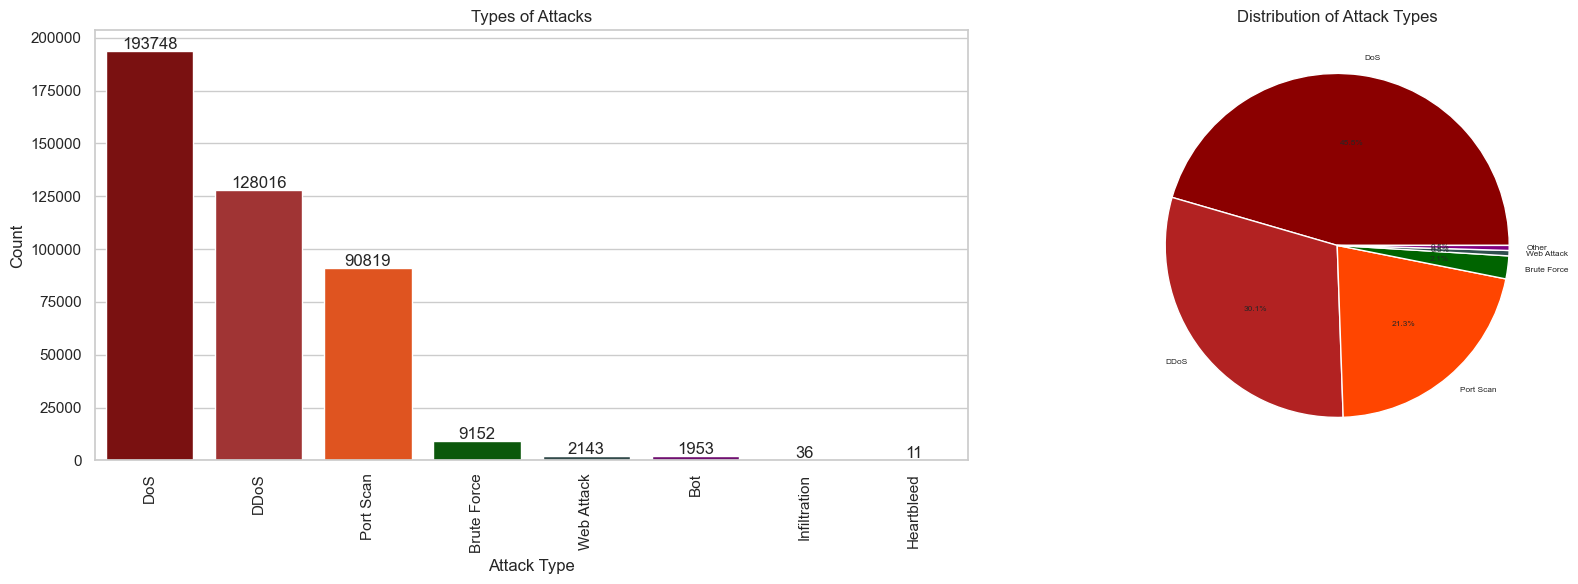

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

# Prepare attack counts and percentages
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace=True)

# Define 8 dark custom colors
dark_colors = ['#8B0000', '#B22222', '#FF4500', '#006400', '#2F4F4F', '#800080', '#8B008B', '#A52A2A']

# Create subplots for the count plot and pie chart
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Count plot for Attack Types
sns.countplot(x='Attack Type', data=attacks, ax=axes[0], order=attacks['Attack Type'].value_counts().index, palette=dark_colors)
axes[0].set_title('Types of Attacks')
axes[0].set_xlabel('Attack Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Annotate count values on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha='center')

# Pie chart for Attack Types Distribution
axes[1].pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', colors=dark_colors, textprops={'fontsize': 6})
axes[1].set_title('Distribution of Attack Types')

# Adjust layout
plt.tight_layout()
plt.show()

In [41]:
data.groupby('Attack Type').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.000000e+06,500000.000000,4.000000e+00,0.000000e+00,4,4,4,4.000000e+00,0.000000e+00,4,4,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,256,0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000,47,51200000,6.396442e+06,5.268490e+06,10200000,234,60200000,7.518954e+06,4.645137e+06,10300000,637,0,0,0,0,296,296,0.149495,0.149495,0,322,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,0.766852,1.738709e+06,3.010454e+06,5214882,124,5216127,2.608064e+06,3.686598e+06,5214882,1245,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,104,40,0.575139,0.191713,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,5840,0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730,2,747,3.735000e+02,5.239661e+02,744,3,1293746,2.156243e+05,5.276719e+05,1292730,2,0,0,0,0,72,152,2.318765,5.410452,0,5840,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,3525,0,703.666667,1395.868284,1.029603e+03,2.707953,3.976889e+05,1.368409e+06,4951173,112,218783,3.125471e+04,3.068629e+04,78311,219,5169833,1.033967e+06,2.218975e+06,5002421,840,0,0,0,0,172,132,1.547402,1.160551,0,3525,354.866667,895.115146,8.012311e+05,0,0,0,1,0,0,0,0,0,380.214286,137.625000,703.666667,172,0,0,0,0,0,0,8,1101,6,4222,8192,254,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,17376,0,4370.686524,2566.935004,6.341193e+04,36.998316,2.703438e+04,1.746258e+05,5024984,0,119000000,4.444951e+04,2.224617e+05,5025702,0,119000000,6.904091e+04,2.738674e+05,5024984,1,0,0,0,0,85928,55336,22.505772,14.492544,0,17376,1713.525708,2669.389319,7.125639e+06,0,0,0,1,0,0,0,0,0,1713.913910,3.090875,4370.686524,85928,0,0,0,0,0,0,2685,8299,1729,7556917,29200,235,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000

## Dropping non variant columns

In [42]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [43]:
data.shape

(2522362, 71)

In [44]:
# Columns after removing non variant columns
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

## Dimensionality Reduction using PCA

In [45]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [46]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.30%


In [47]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [48]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.357605,-0.054980,0.577367,0.734454,3.730371,0.234648,-0.015694,-0.215593,-0.278501,1.087262,0.032711,0.067621,1.638439,0.371324,-0.794797,0.003730,0.069457,0.614933,-0.658005,-0.596658,-0.350690,-0.714309,-1.721585,-0.069528,-0.420207,0.904754,-0.147988,-0.334371,1.487918,-0.163631,-0.219312,-0.004576,0.002609,0.034128,-0.015853,BENIGN
1,-2.883854,-0.069938,0.911321,1.763147,8.846136,0.620454,-0.056858,1.106466,1.906559,-2.756474,-0.950592,-0.843113,6.052572,1.568504,-4.731659,-0.120694,1.313557,1.949344,-0.497494,-0.591938,-0.199933,-0.566894,-5.606576,0.296477,1.603394,0.594120,0.282642,-2.347082,2.238826,-0.640825,-0.367420,0.010520,0.000645,0.125795,-0.190767,BENIGN
2,-2.416928,-0.056683,0.615335,0.850869,4.304213,0.275779,-0.020438,-0.070542,-0.035290,0.664153,-0.076172,-0.033045,2.132309,0.504258,-1.230418,-0.009935,0.206592,0.763981,-0.642472,-0.598090,-0.334834,-0.697290,-2.155998,-0.032073,-0.196749,0.868293,-0.101730,-0.545536,1.572158,-0.213910,-0.234609,-0.003047,0.002402,0.043993,-0.035273,BENIGN
3,-2.884705,-0.069978,0.912183,1.765263,8.851561,0.618717,-0.057028,1.104621,1.906986,-2.752501,-0.950219,-0.842586,6.055982,1.568418,-4.729850,-0.120534,1.312459,1.950124,-0.499796,-0.593895,-0.200827,-0.566254,-5.609324,0.293264,1.602008,0.592174,0.281052,-2.334612,2.239632,-0.638082,-0.366261,0.010372,0.000655,0.125475,-0.190752,BENIGN
4,-1.505248,0.080886,-0.504396,0.290414,-0.539267,0.746103,0.100443,0.732508,-1.145775,-0.563206,-0.043730,-0.207928,-0.433553,0.033402,-0.609130,0.018303,-0.249173,-0.475477,-0.140381,0.113623,-0.114053,0.096071,0.291834,0.385968,-0.255655,-0.689650,-0.599155,0.116353,0.795041,-0.211000,0.042492,-0.014254,0.000957,-0.052009,0.001372,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-2.270966,-0.048462,0.480012,0.461159,2.163937,-0.144601,-0.016015,-0.777804,-0.908055,2.711084,0.413813,0.405736,0.990244,-0.084219,0.911051,0.011116,-0.030085,0.339254,-0.328302,-0.307958,-0.436224,-1.017082,-0.319116,-0.280794,-0.369498,0.762724,-0.043101,0.787857,0.785667,0.247959,0.036167,-0.017415,0.001898,0.005532,-0.005967,BENIGN
2522358,-2.267921,-0.048377,0.478583,0.457923,2.144121,-0.146620,-0.015946,-0.780613,-0.911196,2.717732,0.416385,0.408586,0.957450,-0.091206,0.928823,0.012636,-0.044514,0.326976,-0.347688,-0.340585,-0.425384,-1.035495,-0.346322,-0.274981,-0.359969,0.758203,-0.041162,0.789232,0.787023,0.249306,0.038001,-0.017559,0.001901,0.005085,-0.006293,BENIGN
2522359,-2.267236,-0.048358,0.478260,0.457172,2.139660,-0.147061,-0.015930,-0.781230,-0.911881,2.719162,0.416950,0.409214,0.950138,-0.092751,0.932744,0.012972,-0.047706,0.324249,-0.351975,-0.347804,-0.422976,-1.039582,-0.352317,-0.273678,-0.357846,0.757177,-0.040728,0.789376,0.787329,0.249559,0.038386,-0.017590,0.001901,0.004988,-0.006363,BENIGN
2522360,-2.102459,-0.041899,0.361540,0.268739,1.795816,0.284755,0.006681,-0.296210,-0.631077,0.966695,0.082003,0.111121,-0.168879,0.134400,-0.233594,0.075831,-0.641996,-0.128213,-0.838009,-0.492747,-0.516140,-0.084907,-0.588280,0.123071,-0.998522,0.312900,-0.372704,1.793470,-0.925189,0.297419,0.128586,-0.006211,0.002178,-0.077697,0.032569,BENIGN


# Model Building

In [49]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [50]:
# For cross validation
from sklearn.model_selection import cross_val_score

## Creating a Balanced Dataset for Binary Classification

In [51]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    7616
0    7384
Name: count, dtype: int64


In [52]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

In [53]:
X_train_tensor = torch.tensor(X_train_bc.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_bc.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_bc.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_bc.values, dtype=torch.long)

In [54]:
# Checking input dimensionality
input_dim = X_train_bc.shape[1]
print(f"Input Dimension: {input_dim}")

Input Dimension: 35


In [55]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    # Convert to PyTorch tensors
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [56]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [57]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)


In [58]:
import optuna

def objective(trial):
    # Hyperparameters
    hidden_dim = trial.suggest_int('hidden_dim', 16, 128)
    learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    epochs = trial.suggest_int('epochs', 10, 50)

    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Model, Loss, Optimizer
    model = NeuralNetwork(input_dim=input_dim, hidden_dim=hidden_dim)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training Loop
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze() 
            loss = criterion(outputs, y_batch.float()) 
            loss.backward()
            optimizer.step()

    # Evaluate on test data
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch).squeeze()
            predicted = (outputs > 0.5).int()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = correct / total
    return accuracy


In [59]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-03-05 00:27:33,363] A new study created in memory with name: no-name-f3d9150b-9ba9-41d8-9710-fb6648f37982
[I 2025-03-05 00:27:37,182] Trial 0 finished with value: 0.9653333333333334 and parameters: {'hidden_dim': 33, 'lr': 0.002559961110956357, 'batch_size': 128, 'epochs': 20}. Best is trial 0 with value: 0.9653333333333334.
[I 2025-03-05 00:27:38,897] Trial 1 finished with value: 0.9528 and parameters: {'hidden_dim': 33, 'lr': 0.0004387208679701737, 'batch_size': 64, 'epochs': 13}. Best is trial 0 with value: 0.9653333333333334.
[I 2025-03-05 00:27:43,772] Trial 2 finished with value: 0.9682666666666667 and parameters: {'hidden_dim': 31, 'lr': 0.0014735907344438526, 'batch_size': 32, 'epochs': 23}. Best is trial 2 with value: 0.9682666666666667.
[I 2025-03-05 00:27:57,806] Trial 3 finished with value: 0.9733333333333334 and parameters: {'hidden_dim': 114, 'lr': 0.0034632196828025884, 'batch_size': 16, 'epochs': 26}. Best is trial 3 with value: 0.9733333333333334.
[I 2025-03-05

In [60]:
best_params = study.best_trial.params
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'hidden_dim': 116, 'lr': 0.005403992284500727, 'batch_size': 32, 'epochs': 34}


In [61]:
# Extract best hyperparameters
hidden_dim = best_params['hidden_dim']
learning_rate = best_params['lr']
batch_size = best_params['batch_size']
epochs = best_params['epochs']

In [62]:
# DataLoader with the best batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [63]:
# Initialize the final model, loss, and optimizer
final_model = NeuralNetwork(input_dim=input_dim, hidden_dim=hidden_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=learning_rate)

In [64]:
# Training the final model
for epoch in range(epochs):
    final_model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = final_model(X_batch).squeeze()  # Squeeze for BCELoss compatibility
        loss = criterion(outputs, y_batch.float())  # Convert labels to float
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

Epoch 1/34, Loss: 65.3632
Epoch 2/34, Loss: 44.6693
Epoch 3/34, Loss: 42.1844
Epoch 4/34, Loss: 41.8729
Epoch 5/34, Loss: 39.7850
Epoch 6/34, Loss: 38.3426
Epoch 7/34, Loss: 36.8327
Epoch 8/34, Loss: 36.2786
Epoch 9/34, Loss: 35.5841
Epoch 10/34, Loss: 33.4595
Epoch 11/34, Loss: 34.0766
Epoch 12/34, Loss: 33.4660
Epoch 13/34, Loss: 32.4797
Epoch 14/34, Loss: 31.4488
Epoch 15/34, Loss: 33.1731
Epoch 16/34, Loss: 30.7985
Epoch 17/34, Loss: 30.2333
Epoch 18/34, Loss: 30.1517
Epoch 19/34, Loss: 30.6259
Epoch 20/34, Loss: 28.6995
Epoch 21/34, Loss: 28.3925
Epoch 22/34, Loss: 27.7386
Epoch 23/34, Loss: 30.5233
Epoch 24/34, Loss: 27.0281
Epoch 25/34, Loss: 27.3195
Epoch 26/34, Loss: 26.8992
Epoch 27/34, Loss: 37.6433
Epoch 28/34, Loss: 54.9150
Epoch 29/34, Loss: 27.5823
Epoch 30/34, Loss: 26.5697
Epoch 31/34, Loss: 26.4259
Epoch 32/34, Loss: 26.3860
Epoch 33/34, Loss: 25.8253
Epoch 34/34, Loss: 25.3686


In [65]:
# Evaluate the final model
final_model.eval()
total = 0
correct = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = final_model(X_batch).squeeze()
        predicted = (outputs > 0.5).int()
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Final Model Accuracy: {accuracy:.4f}")

Final Model Accuracy: 0.9763


In [66]:
torch.save(final_model.state_dict(), "final_model_bc.pth")
print("Model saved as final_model_bc.pth")

Model saved as final_model_bc.pth


In [67]:
loaded_model = NeuralNetwork(input_dim=input_dim, hidden_dim=hidden_dim)
loaded_model.load_state_dict(torch.load("final_model_bc.pth"))
loaded_model.eval()
print("Model loaded successfully.")


Model loaded successfully.


In [68]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

all_predictions = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = final_model(X_batch).squeeze()
        predicted = (outputs > 0.5).int()
        all_predictions.extend(predicted.numpy())
        all_labels.extend(y_batch.numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "F1 Score", "Precision", "Recall"],
    "Value": [accuracy, f1, precision, recall]
})

print(metrics_df)

      Metric     Value
0   Accuracy  0.976267
1   F1 Score  0.977091
2  Precision  0.968367
3     Recall  0.985974


## Creating a Balanced Dataset for Multiclass Classification

In [69]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [70]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: count, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Bot            5000
DoS            5000
DDoS           5000
Brute Force    5000
BENIGN         5000
Port Scan      5000
Web Attack     5000
Name: count, dtype: int64

In [72]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode labels as integers
y_train_mc = label_encoder.fit_transform(y_train_mc)
y_test_mc = label_encoder.transform(y_test_mc)

# Check the result
print(f"Classes: {label_encoder.classes_}")
print(f"y_train_mc sample: {y_train_mc[:5]}")
print(f"y_test_mc sample: {y_test_mc[:5]}")

Classes: ['BENIGN' 'Bot' 'Brute Force' 'DDoS' 'DoS' 'Port Scan' 'Web Attack']
y_train_mc sample: [5 0 1 4 6]
y_test_mc sample: [3 1 6 0 5]


In [74]:
# Define the number of classes in the dataset
num_classes = len(label_encoder.classes_)

# Print the number of classes
print(f"Number of classes: {num_classes}")

Number of classes: 7


In [75]:
X_train_tensor = torch.tensor(X_train_mc.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_mc, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_mc.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_mc, dtype=torch.long)

In [76]:
# Prepare data loaders
def create_data_loaders(batch_size):
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [77]:
# Define the neural network class
def define_model(input_dim, output_dim, hidden_dim, neurons_per_layer, dropout_rate):
    layers = []
    layers.append(nn.Linear(input_dim, hidden_dim))
    layers.append(nn.ReLU())
    layers.append(nn.Dropout(dropout_rate))

    for _ in range(neurons_per_layer - 1):
        layers.append(nn.Linear(hidden_dim, hidden_dim))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))

    layers.append(nn.Linear(hidden_dim, output_dim))
    return nn.Sequential(*layers)

In [78]:
def objective(trial):
    hidden_dim = trial.suggest_int('hidden_dim', 16, 128)
    neurons_per_layer = trial.suggest_int("neurons_per_layer", 1, 5)
    learning_rate = trial.suggest_loguniform('lr', 1e-4, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    epochs = trial.suggest_int('epochs', 10, 50)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

    input_dim = X_train_mc.shape[1]
    output_dim = num_classes

    train_loader, test_loader = create_data_loaders(batch_size)

    model = define_model(input_dim, output_dim, hidden_dim, neurons_per_layer, dropout_rate)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.tolist())
            y_true.extend(y_batch.tolist())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    trial.set_user_attr("accuracy", accuracy)
    trial.set_user_attr("precision", precision)
    trial.set_user_attr("recall", recall)
    trial.set_user_attr("f1", f1)

    # Save the best model
    if trial.number == 0 or accuracy > trial.study.best_value:
        torch.save(model.state_dict(), 'best_model.pth')

    return accuracy

In [79]:
study_mc = optuna.create_study(direction='maximize')
study_mc.optimize(objective, n_trials=50)

[I 2025-03-05 00:35:23,212] A new study created in memory with name: no-name-e818d675-3f72-49a9-b082-69b2809f5145
[I 2025-03-05 00:39:03,352] Trial 0 finished with value: 0.1430857142857143 and parameters: {'hidden_dim': 125, 'neurons_per_layer': 5, 'lr': 0.0722804035867704, 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 46, 'weight_decay': 2.3670839985077333e-05}. Best is trial 0 with value: 0.1430857142857143.
[I 2025-03-05 00:39:11,655] Trial 1 finished with value: 0.8732571428571428 and parameters: {'hidden_dim': 60, 'neurons_per_layer': 5, 'lr': 0.00014390462335684543, 'batch_size': 128, 'dropout_rate': 0.4, 'epochs': 11, 'weight_decay': 6.685569570823341e-05}. Best is trial 1 with value: 0.8732571428571428.
[I 2025-03-05 00:39:21,193] Trial 2 finished with value: 0.9773714285714286 and parameters: {'hidden_dim': 90, 'neurons_per_layer': 1, 'lr': 0.002868110728913066, 'batch_size': 128, 'dropout_rate': 0.2, 'epochs': 25, 'weight_decay': 0.00020054607811922492}. Best is trial 2 w

In [80]:
print("Best trial:")
print(f"  Accuracy: {study_mc.best_value}")
print(f"  Best hyperparameters: {study_mc.best_params}")

Best trial:
  Accuracy: 0.9814857142857143
  Best hyperparameters: {'hidden_dim': 98, 'neurons_per_layer': 3, 'lr': 0.0002599213478784343, 'batch_size': 16, 'dropout_rate': 0.4, 'epochs': 33, 'weight_decay': 6.854337902055347e-05}


In [81]:
best_trial = study_mc.best_trial
print(f"  Precision: {best_trial.user_attrs['precision']}")
print(f"  Recall: {best_trial.user_attrs['recall']}")
print(f"  F1 Score: {best_trial.user_attrs['f1']}")

  Precision: 0.9817078124835688
  Recall: 0.9814857142857143
  F1 Score: 0.9813126597190149


In [82]:
## Saving the metrics in a DataFrame
metrics_data = {
    "Trial Number": [best_trial.number],
    "Accuracy": [best_trial.user_attrs['accuracy']],
    "Precision": [best_trial.user_attrs['precision']],
    "Recall": [best_trial.user_attrs['recall']],
    "F1 Score": [best_trial.user_attrs['f1']]
}
metrics_df = pd.DataFrame(metrics_data)

# Save the DataFrame to a CSV file
metrics_df.to_csv('best_trial_metrics.csv', index=False)

print("Metrics saved to best_trial_metrics.csv")

Metrics saved to best_trial_metrics.csv


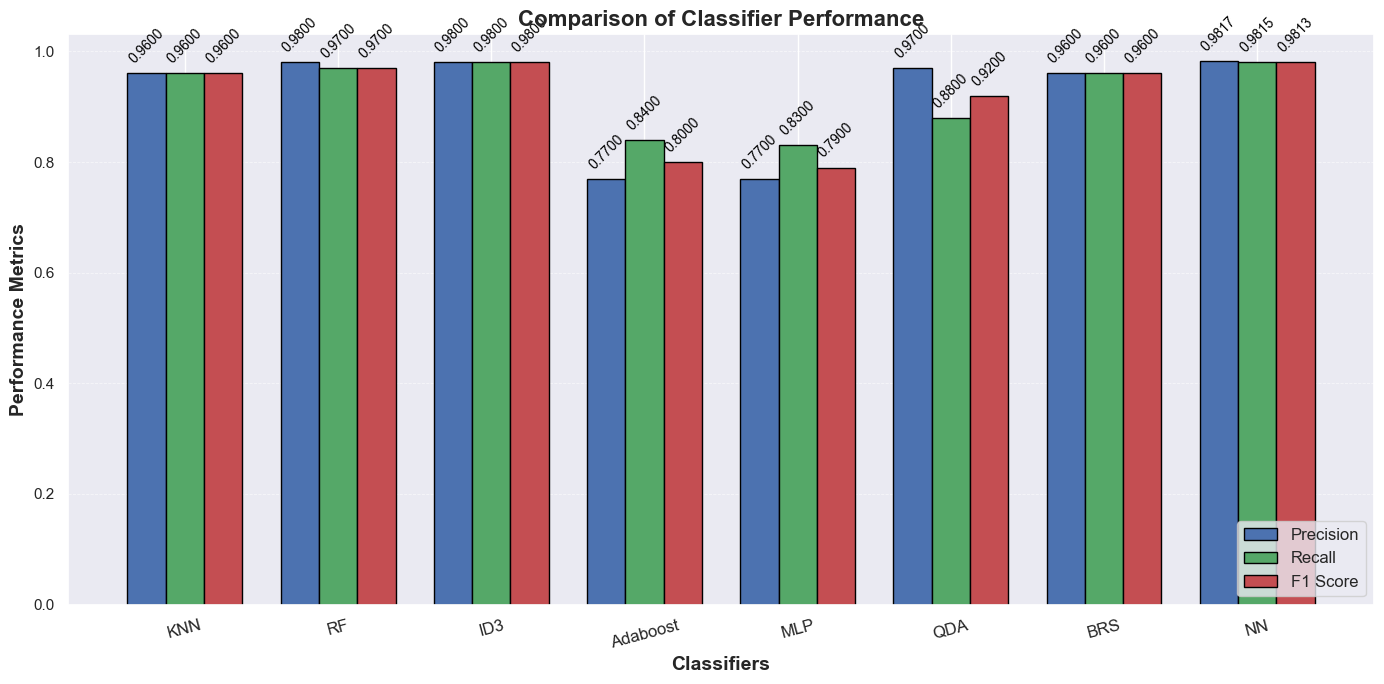

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
# Data for the classifiers and their performance
classifiers = ['KNN', 'RF', 'ID3', 'Adaboost', 'MLP', 'QDA', 'BRS', 'NN']
precision = [0.96, 0.98, 0.98, 0.77, 0.77, 0.97, 0.96, 0.9817078124835688]
recall = [0.96, 0.97, 0.98, 0.84, 0.83, 0.88, 0.96, 0.9814857142857143]
f1_score = [0.96, 0.97, 0.98, 0.80, 0.79, 0.92, 0.96, 0.9813126597190149]

x = np.arange(len(classifiers))  # the label locations
width = 0.25  # the width of the bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Bar plots with refined colors
bar1 = ax.bar(x - width, precision, width, label='Precision', color='#4c72b0', edgecolor='black')
bar2 = ax.bar(x, recall, width, label='Recall', color='#55a868', edgecolor='black')
bar3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='#c44e52', edgecolor='black')

# Titles and Labels
ax.set_xlabel('Classifiers', fontsize=14, fontweight='bold')
ax.set_ylabel('Performance Metrics', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Classifier Performance', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, fontsize=12, rotation=15)
ax.legend(fontsize=12, loc='lower right')

# Grid Styling
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)

# Function to add values above bars with rotation
def add_values(bars, data):
    for bar, value in zip(bars, data):
        height = bar.get_height()
        ax.annotate(f'{value:.4f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  
                    textcoords="offset points",
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    rotation=45)  # Rotated labels

# Apply function to bars
add_values(bar1, precision)
add_values(bar2, recall)
add_values(bar3, f1_score)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
